1.缺失值
查看缺失情况

In [15]:
# 加载需要的包
import pandas as pd

# 加载训练数据集
data = pd.read_csv(r"./data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId => 乘客ID

Survived => 是否幸存

Pclass => 乘客等级(1/2/3等舱位)

Name => 乘客姓名

Sex => 性别

Age => 年龄

SibSp => 堂兄弟/妹个数

Parch => 父母与小孩个数

Ticket => 船票信息

Fare => 票价

Cabin => 客舱

Embarked => 登船港口

In [16]:
# 数据的属性
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# 数据的总体状况（类型，缺失）
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. 数据的属性探测

In [18]:
import matplotlib.pyplot as plt
import seaborn
# 显示中文标题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 查看有多少人丧生，多少人获救
print(data['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, '乘客等级分布')

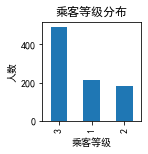

In [19]:
# 绘图
fig = plt.figure()
# 乘客等级分布
plt.subplot2grid((2, 3), (0, 0))
data['Pclass'].value_counts().plot(kind='bar')
plt.ylabel(u"人数")
plt.xlabel(u'乘客等级')
plt.title(u'乘客等级分布')

Text(0.5, 1.0, '乘客性别分布')

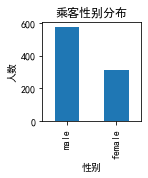

In [20]:
# 乘客性别分布
plt.subplot2grid((2, 3), (0, 1))
data['Sex'].value_counts().plot(kind='bar')
plt.ylabel(u"人数")
plt.xlabel(u'性别')
plt.title(u'乘客性别分布')

Text(0.5, 1.0, '乘客年龄分布')

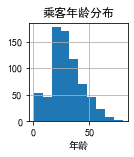

In [21]:

# 乘客的年龄分布
plt.subplot2grid((2, 3), (0, 2))
data['Age'].hist()
plt.xlabel(u'年龄')
plt.title(u'乘客年龄分布')

Text(0.5, 1.0, '船票票价分布')

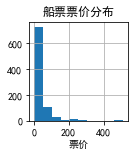

In [22]:
# 票价的分布
plt.subplot2grid((2, 3), (1, 0))
data['Fare'].hist()
plt.xlabel(u'票价')
plt.title(u'船票票价分布')

Text(0.5, 1.0, '票价箱线图')

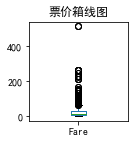

In [23]:
# 箱线图：票价的异常情况探查
plt.subplot2grid((2, 3), (1, 1))
data['Fare'].plot(kind='box')
plt.title(u'票价箱线图')

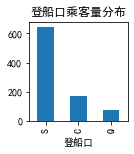

In [24]:
# 登船港口的分布情况
plt.subplot2grid((2, 3), (1, 2))
data['Embarked'].value_counts().plot(kind='bar')
plt.xlabel(u'登船口')
plt.title(u'登船口乘客量分布')
plt.show()

In [25]:
data.head(20)[["Survived","Age"]]


,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


In [26]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

def knn_filled_func(x_train, y_train, test, k = 3, dispersed = True):
    # params: x_train 为目标列不含缺失值的数据（不包括目标列）
    # params: y_train 为不含缺失值的目标列
    # params: test 为目标列为缺失值的数据（不包括目标列）
    if dispersed:
        knn= KNeighborsClassifier(n_neighbors = k, weights = "distance")
    else:
        knn= KNeighborsRegressor(n_neighbors = k, weights = "distance")

    knn.fit(x_train, y_train)

    return knn.predict(test)



# 我们使用Survived插值Age（前20条记录），实际中用其他所有特征去计算，这里选了一个特征
x_train = data.head(20)[~data.head(20)["Age"].isnull()][["Survived"]]
y_train = data.head(20)[~data.head(20)["Age"].isnull()]["Age"]
test = data.head(20)[data.head(20)["Age"].isnull()][["Survived"]]

y_predict = knn_filled_func(x_train, y_train, test, k = 3, dispersed = True)
y_predict

array([22., 26., 26.])

In [27]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


def knn_filled_func(x_train, y_train, test, k = 3, dispersed = True):
    # params: x_train 为目标列不含缺失值的数据（不包括目标列）
    # params: y_train 为不含缺失值的目标列
    # params: test 为目标列为缺失值的数据（不包括目标列）
    if dispersed:
        rf= RandomForestRegressor()
    else:
        rf= RandomForestClassifier()
    rf.fit(x_train, y_train)

    return rf.predict(test)

y_predict_rf = knn_filled_func(x_train, y_train, test, k = 3, dispersed = True)
y_predict_rf

array([23.47569769, 31.54163925, 31.54163925])

In [28]:
print(data['SibSp'].value_counts())
print(data['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


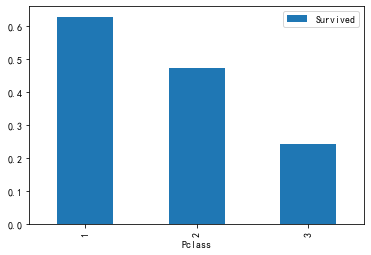

In [29]:
data[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()
plt.show()

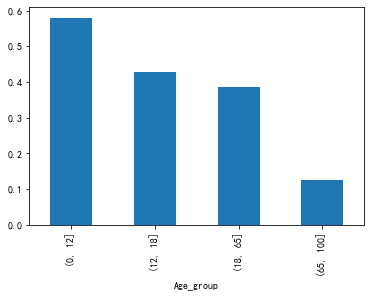

In [31]:
bins = [0, 12, 18, 65, 100]
data['Age_group'] = pd.cut(data['Age'], bins)
data.groupby(['Age_group'])['Survived'].mean().plot.bar()
plt.show()

In [32]:
data.groupby(['Age_group'])['Survived'].count()

Age_group
(0, 12]       69
(12, 18]      70
(18, 65]     567
(65, 100]      8
Name: Survived, dtype: int64

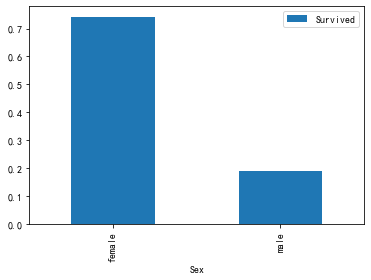

In [33]:
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

In [34]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(data['Title'], data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
